In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

def count_files_in_folder(folder_path):
    # Initialize a counter
    file_count = 0

    # Iterate through the files in the folder
    for _, _, files in os.walk(folder_path):
        file_count += len(files)

    return file_count

# Example usage:
folder_path = input("Enter the path of the folder: ")
print("Number of files in the folder:", count_files_in_folder(folder_path))

Enter the path of the folder: /content/drive/MyDrive/Deep_Fashion_Sample_Images/Yolo format images
Number of files in the folder: 350


In [ ]:
import os
import random
import shutil

def split_dataset(source_folder, destination_folder):
    # Create train, val, and test folders
    train_folder = os.path.join(destination_folder, 'train')
    val_folder = os.path.join(destination_folder, 'val')
    test_folder = os.path.join(destination_folder, 'test')
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(val_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)

    # Get list of all images in the source folder
    all_images = os.listdir(source_folder)
    random.shuffle(all_images)

    # Select 500 random images
    selected_images = random.sample(all_images, 500)

    # Calculate number of images for each split
    total_images = len(selected_images)
    print(len(selected_images))
    train_count = int(0.7 * total_images)
    print(train_count)
    val_count = int(0.2 * total_images)
    print(val_count)
    test_count = total_images - train_count - val_count
    print(test_count)

    # Split the images into train, val, and test sets
    train_images = selected_images[:train_count]
    val_images = selected_images[train_count:train_count+val_count]
    test_images = selected_images[train_count+val_count:]

    # Move images to their respective folders
    for image in train_images:
        shutil.copy(os.path.join(source_folder, image), os.path.join(train_folder, image))
    for image in val_images:
        shutil.copy(os.path.join(source_folder, image), os.path.join(val_folder, image))
    for image in test_images:
        shutil.copy(os.path.join(source_folder, image), os.path.join(test_folder, image))

# Specify source and destination folders
source_folder = '/content/drive/MyDrive/Dataset/sample_images_Deep_Fashion/train/val'
destination_folder = '/content/drive/MyDrive/Deep_Fashion_Sample_Images'

# Call the function to split the dataset
split_dataset(source_folder, destination_folder)

print("Dataset split successfully!")

500
350
100
50
Dataset split successfully!


In [ ]:
import json

def preview_json(file_path, num_lines=100):
    try:
        with open(file_path, 'r') as file:
            # Read the first `num_lines` lines of the file
            lines = [next(file) for _ in range(num_lines)]
            # Join the lines into a single string
            json_str = ''.join(lines)
            # Load the JSON string
            data = json.loads(json_str)
            # Print a sample of the JSON data
            print(json.dumps(data, indent=4))
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        # Attempt to load JSON line by line, skipping the problematic line
        data = []
        for line_number, line in enumerate(lines, start=1):
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError:
                print(f"Skipping line {line_number} due to JSON syntax error.")
                pass
        if data:
            print("Partial JSON data (excluding problematic lines):")
            print(json.dumps(data, indent=4))

# Usage example
file_path = '/content/drive/MyDrive/Dataset/deep_fashion/annotations/instances_train2024.json'
preview_json(file_path)

Error decoding JSON: Expecting value: line 101 column 1 (char 2428)
Skipping line 1 due to JSON syntax error.
Skipping line 2 due to JSON syntax error.
Skipping line 3 due to JSON syntax error.
Skipping line 4 due to JSON syntax error.
Skipping line 5 due to JSON syntax error.
Skipping line 6 due to JSON syntax error.
Skipping line 7 due to JSON syntax error.
Skipping line 8 due to JSON syntax error.
Skipping line 9 due to JSON syntax error.
Skipping line 10 due to JSON syntax error.
Skipping line 11 due to JSON syntax error.
Skipping line 12 due to JSON syntax error.
Skipping line 13 due to JSON syntax error.
Skipping line 14 due to JSON syntax error.
Skipping line 15 due to JSON syntax error.
Skipping line 16 due to JSON syntax error.
Skipping line 17 due to JSON syntax error.
Skipping line 18 due to JSON syntax error.
Skipping line 19 due to JSON syntax error.
Skipping line 20 due to JSON syntax error.
Skipping line 21 due to JSON syntax error.
Skipping line 22 due to JSON syntax er

In [ ]:
import json
import os

# Load the JSON file
with open('/content/drive/MyDrive/Dataset/deep_fashion/annotations/instances_val2024.json') as f:
    data = json.load(f)

# Path to the directory containing the images
images_directory = '/content/drive/MyDrive/Deep_Fashion_Sample_Images/val'

# Populate the list of image IDs from the image filenames
image_ids_subset = [filename.split('.')[0] for filename in os.listdir(images_directory) if filename.endswith('.jpg')]

# Map category IDs to class indices
category_map = {category['id']: i for i, category in enumerate(data['categories'])}

# Function to convert bounding box coordinates to YOLO format
def convert_to_yolo(bbox, width, height):
    x_min, y_min, width_bb, height_bb = bbox
    x_center = (x_min + width_bb / 2) / width
    y_center = (y_min + height_bb / 2) / height
    normalized_width = width_bb / width
    normalized_height = height_bb / height
    return x_center, y_center, normalized_width, normalized_height

# Create output directory for YOLO format files
output_dir = '/content/drive/MyDrive/Deep_Fashion_Sample_Images/Yolo format images'
os.makedirs(output_dir, exist_ok=True)

# Iterate through annotations and create YOLO format files for the subset of images
for annotation in data['annotations']:
    image_id = annotation['image_id']
    if image_id in image_ids_subset:
        category_id = annotation['category_id']
        bbox = annotation['bbox']
        width, height = 640, 480  # Assuming fixed width and height for simplicity

        class_index = category_map[category_id]
        x_center, y_center, width_norm, height_norm = convert_to_yolo(bbox, width, height)

        # Write to YOLO format file
        with open(os.path.join(output_dir, f'{image_id}.txt'), 'a') as f:
            f.write(f'{class_index} {x_center} {y_center} {width_norm} {height_norm}\n')


In [ ]:
import zipfile
import os

def extract_zip(zip_file):
    # Get the full path of the zip file
    zip_file_path = os.path.abspath(zip_file)

    # Create a ZipFile object
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all the contents of the zip file to the current working directory
        zip_ref.extractall(os.path.dirname(zip_file_path))

if __name__ == "__main__":
    zip_file = '/content/drive/MyDrive/Deep_Fashion_Sample_Images/Yolov9_main/yolov9-main.zip'
    extract_zip(zip_file)
    print("Extraction complete.")

Extraction complete.


In [ ]:
!python /content/drive/MyDrive/Deep_Fashion_Sample_Images/Yolov9_main/segment/train.py --config /content/config.yaml

2024-05-15 00:14:33.052873: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 00:14:33.052940: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 00:14:33.054519: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-15 00:14:34.505119: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
segment/train: batch_size=16, epochs=100, img-size=640, device=, min-items=0, close_mosaic=1, data=/content/drive/MyDrive/Deep_Fashion_Sample_Images/data.yaml, weights=/content/drive/MyDrive/Deep_Fashion_Sample_Images/Weights/yolov9-c.pt, cf

In [ ]:
!nvidia-smi

Tue May 14 15:14:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!git clone https://github.com/WongKinYiu/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 668, done.
remote: Counting objects: 100% (668/668), done.
remote: Compressing objects: 100% (405/405), done.
remote: Total 668 (delta 271), reused 575 (delta 246), pack-reused 0
Receiving objects: 100% (668/668), 3.23 MiB | 29.01 MiB/s, done.
Resolving deltas: 100% (271/271), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.8 MB/s eta 0:00:00


In [ ]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00


In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 May 14 15:19 .
drwxr-xr-x 1 root root      4096 May 14 15:21 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [ ]:
!wget -P {HOME}/data -q https://www.denimjeansobserver.com/mag/designer-denim-jeans-fashion/2014/ss/brands-l01/louis-vuitton-marc-jacobs-paris-france-2014-resort-cruise-pre-spring-primavera-donna-womens-fashion-show-presentation-denim-jeanswear-skirt-shredded-hem-boucle-01x.jpg

In [ ]:
SOURCE_IMAGE_PATH = f"{HOME}/7c83ca5fbf638c62499c14f25f13f4e4.jpg"

In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/7c83ca5fbf638c62499c14f25f13f4e4.jpg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/7c83ca5fbf638c62499c14f25f13f4e4.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-89-g93f1a28 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 387 layers, 25288768 parameters, 0 gradients, 102.1 GFLOPs
image 1/1 /content/7c83ca5fbf638c62499c14f25f13f4e4.jpg: 384x640 (no detections), 168.1ms
Speed: 0.7ms pre-process, 168.1ms inference, 109.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


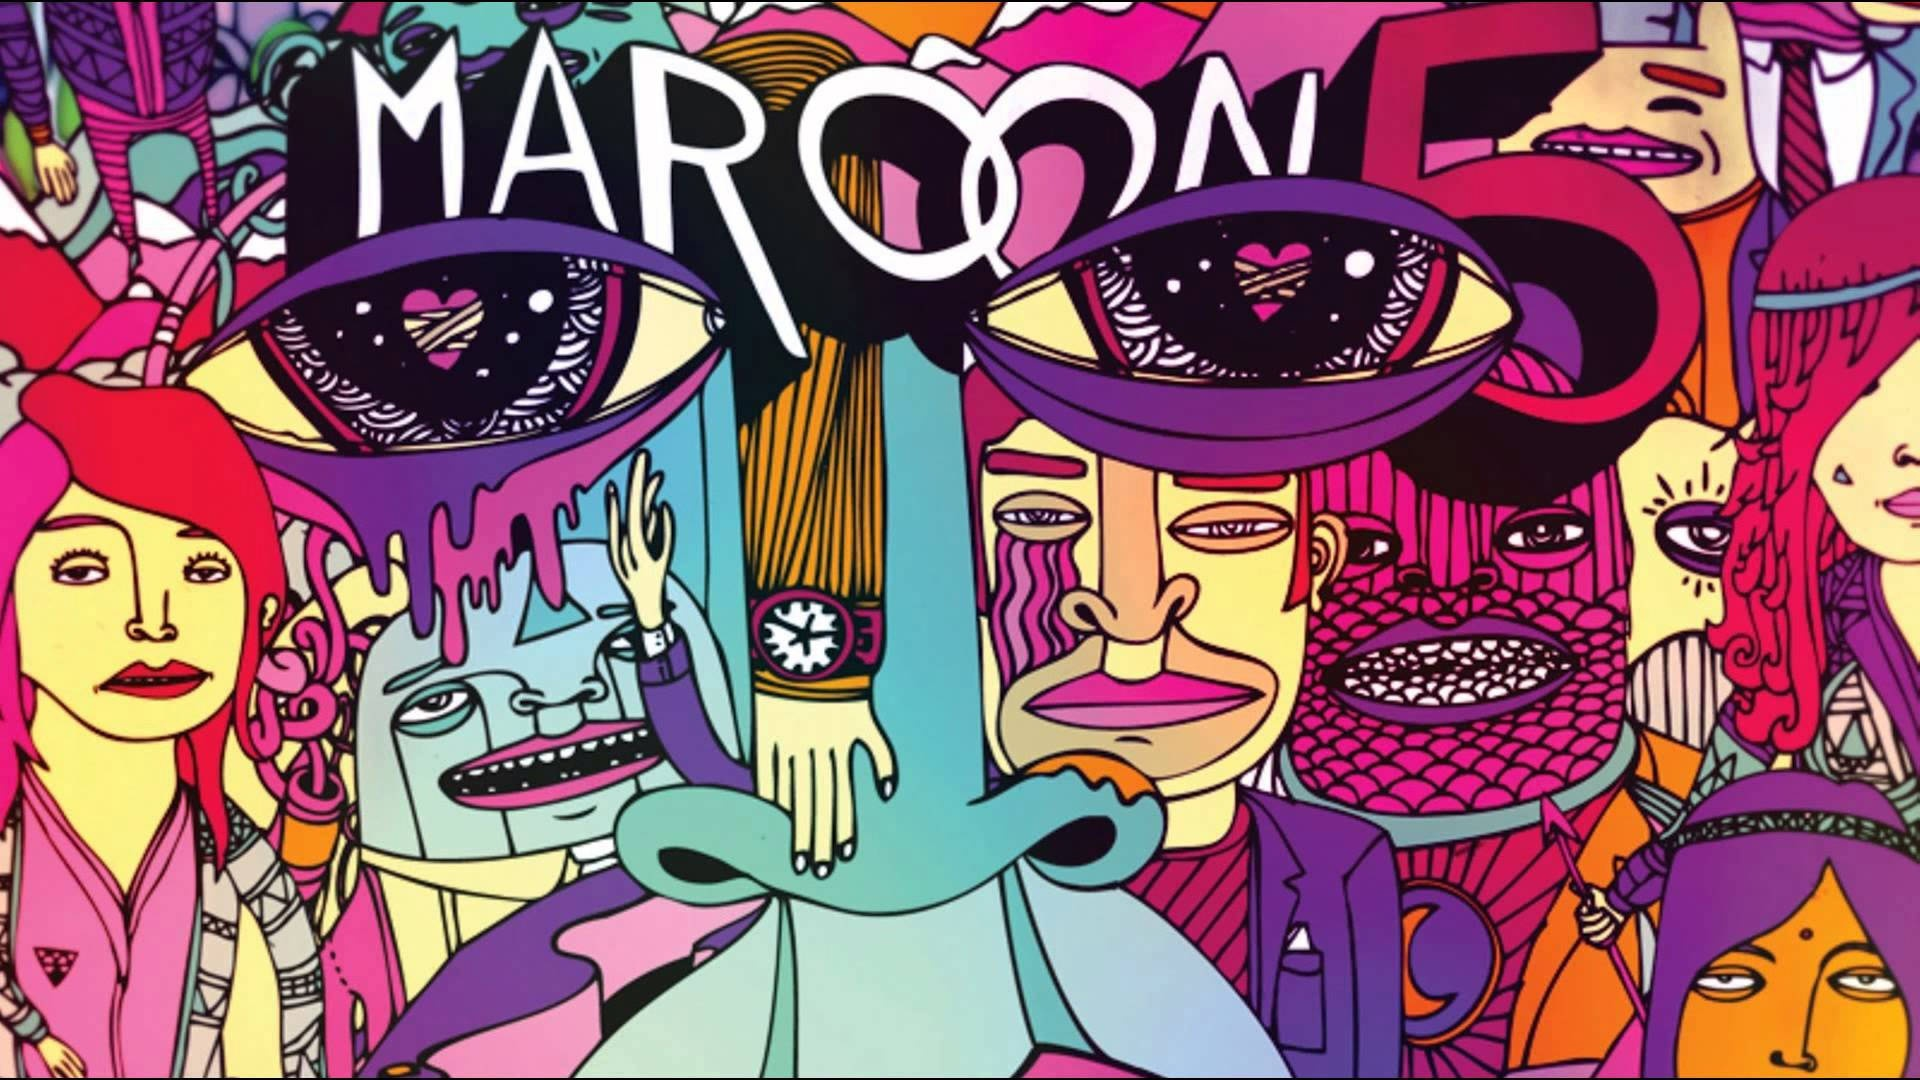

In [ ]:
from IPython.display import Image
Image(filename=f"/content/yolov9/runs/detect/exp5/7c83ca5fbf638c62499c14f25f13f4e4.jpg", width=600)

In [ ]:
from roboflow import Roboflow
from google.colab import userdata

def get_data(api):
  rf = Roboflow(api_key=api)
  project = rf.workspace("srddev").project("deepfashion2-bfwof")
  version = project.version(1)
  dataset = version.download("yolov9")

# get_data(userdata.get('roboflow'))
get_data(api='HXexb85lWIHRx8LPjcDp')

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to DeepFashion2-1 in yolov9:: 100%|██████████| 1168/1168 [00:00<00:00, 5642.80it/s]


In [ ]:
%cd {HOME}/yolov9
!python train.py \
--batch 8 --epochs 100 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/yolov9/DeepFashion2-1/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-05-14 15:53:19.199420: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 15:53:19.199479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 15:53:19.201344: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-14 15:53:20.813138: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/DeepFashion2-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False

In [ ]:
%cd {HOME}/yolov9


!python train.py --cfg /content/config.yaml

/content/yolov9
2024-05-14 16:01:32.815770: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 16:01:32.815828: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 16:01:32.817303: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-14 16:01:33.998265: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=, cfg=/content/config.yaml, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=Fal